In [138]:
import pyAudioAnalysis
import librosa 
import librosa.display
from librosa import display
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib import offsetbox

import IPython.display as ipd 
from IPython.display import Audio
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
import seaborn as sns
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
from sklearn.manifold import Isomap
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
# feature extraction

def extract_features(y, sr, y_harmonic, y_percussive):
    tempo, beat_frames = librosa.beat.beat_track(y=y_harmonic, sr=sr)
    
    chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)

    mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)

    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    zrate = librosa.feature.zero_crossing_rate(y_harmonic)


    #df generation
    chroma_mean=np.mean(chroma,axis=1)
    chroma_std=np.std(chroma,axis=1)
    chroma_df=pd.DataFrame()
    for i in range(0,12):
        chroma_df['chroma_mean_'+str(i)]=chroma_mean[i]
    for i in range(0,12):
        chroma_df['chroma_std_'+str(i)]=chroma_mean[i]
    chroma_df.loc[0]=np.concatenate((chroma_mean,chroma_std),axis=0)

    mfccs_mean=np.mean(mfccs,axis=1)
    mfccs_std=np.std(mfccs,axis=1)
    mfccs_df=pd.DataFrame()
    for i in range(0,13):
        mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
    for i in range(0,13):
        mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
    mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)

    cent_mean=np.mean(cent)
    cent_std=np.std(cent)
    cent_skew=scipy.stats.skew(cent,axis=1)[0]

    contrast_mean=np.mean(contrast,axis=1)
    contrast_std=np.std(contrast,axis=1)
    contrast_df=pd.DataFrame()

    rolloff_mean=np.mean(rolloff)
    rolloff_std=np.std(rolloff)
    rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]

    spectral_df=pd.DataFrame()
    collist=['cent_mean','cent_std','cent_skew']
    for i in range(0,7):
        collist.append('contrast_mean_'+str(i))
    for i in range(0,7):
        collist.append('contrast_std_'+str(i))
    collist=collist+['rolloff_mean','rolloff_std','rolloff_skew']
    for c in collist:
        spectral_df[c]=0
    data=np.concatenate(([cent_mean,cent_std,cent_skew],contrast_mean,contrast_std,[rolloff_mean,rolloff_std,rolloff_std]),axis=0)
    spectral_df.loc[0]=data

    zrate_mean=np.mean(zrate)
    zrate_std=np.std(zrate)
    zrate_skew=scipy.stats.skew(zrate,axis=1)[0]

    zrate_df=pd.DataFrame()
    zrate_df['zrate_mean']=0
    zrate_df['zrate_std']=0
    zrate_df['zrate_skew']=0
    zrate_df.loc[0]=[zrate_mean,zrate_std,zrate_skew]

    beat_df=pd.DataFrame()
    beat_df['tempo']=tempo
    beat_df.loc[0]=tempo

    final_df=pd.concat((chroma_df,mfccs_df,spectral_df,zrate_df,beat_df),axis=1)
    return(final_df)

In [ ]:
features = pd.DataFrame()
for i in range(0, 90):
    audiofile = "data/"+ str(i) + ".mp3"
    y, sr = librosa.load(audiofile, sr=None)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    
    extracted_features = extract_features(y, sr, y_harmonic, y_percussive)
    features = features.append(extracted_features, ignore_index=True)

features.head()

In [6]:
features = pd.read_csv('features.csv')
features.drop(features.iloc[:, 0:1], inplace = True, axis = 1)
features

chroma_mean_0  chroma_mean_1  chroma_mean_2  chroma_mean_3  chroma_mean_4  \
0        0.231421       0.186590       0.107683       0.137675       0.200975   
1        0.185160       0.311230       0.354897       0.254202       0.228670   
2        0.157358       0.220319       0.276541       0.176880       0.260981   
3        0.120353       0.139668       0.521671       0.119480       0.197033   
4        0.351043       0.434299       0.394558       0.361583       0.350896   
..            ...            ...            ...            ...            ...   
85       0.263572       0.124398       0.094149       0.155877       0.260538   
86       0.215255       0.205367       0.366909       0.204256       0.168841   
87       0.098241       0.180251       0.272270       0.107837       0.329332   
88       0.224332       0.285307       0.230694       0.314764       0.172872   
89       0.260239       0.191048       0.130473       0.310201       0.112896   

    chroma_mean_5  chroma_mean_6  chroma_mean_7  chroma_mean_8  chroma_mean_9  \
0        0.260171       0.388468       0.265345       0.132825       0.284483   
1        0.356356       0.335054       0.280357       0.258845       0.231126   
2        0.257058       0.285777       0.360702       0.277349       0.357773   
3        0.275092       0.078158       0.254132       0.140241       0.436430   
4        0.219356       0.133163       0.192126       0.136589       0.092689   
..            ...            ...            ...            ...            ...   
85       0.197386       0.428052       0.277757       0.155798       0.098714   
86       0.148981       0.184719       0.324986       0.222507       0.290757   
87       0.105387       0.287262       0.195334       0.047161       0.267305   
88       0.105381       0.204212       0.289587       0.403313       0.269828   
89       0.154357       0.103677       0.203385       0.413326       0.207739   

    ...  contrast_std_4  contrast_std_5  contrast_std_6  rolloff_mean  \
0   ...        5.123449        3.388847        3.798010   4324.875125   
1   ...        2.667045        2.161149        4.343750   4500.331037   
2   ...        2.878435        2.668451        2.817073   7096.185872   
3   ...        3.643114        3.364696        5.651143   1963.220031   
4   ...        4.349230        3.802632        5.644590   3293.812822   
..  ...             ...             ...             ...           ...   
85  ...        3.413623        2.420842        2.117365   3761.688150   
86  ...        3.034948        2.710805        4.281488   8086.796516   
87  ...        3.499442        3.675071        4.364988   3904.781907   
88  ...        7.277546        3.889091        5.987803   5879.723677   
89  ...        3.515771        2.304923        4.265014   6413.904040   

    rolloff_std  rolloff_skew  zrate_mean  zrate_std  zrate_skew       tempo  
0   2829.505008   2829.505008    0.024012   0.024167    2.242027  166.708669  
1   1450.760714   1450.760714    0.018778   0.011140    1.493908  123.046875  
2   2382.687303   2382.687303    0.034615   0.012853    0.620242   97.508844  
3   1706.304295   1706.304295    0.015198   0.010611    4.880290  129.199219  
4   2258.227079   2258.227079    0.016285   0.017055    1.890445  178.205819  
..          ...           ...         ...        ...         ...         ...  
85  1304.833886   1304.833886    0.028592   0.007799    0.635719  139.674831  
86  2025.200513   2025.200513    0.049244   0.024738    0.854865  151.999081  
87  1965.163028   1965.163028    0.030164   0.011471    1.485543   79.507212  
88  2692.318805   2692.318805    0.052883   0.025541    0.783442   89.102909  
89  1496.487073   1496.487073    0.024820   0.013604    1.428384  184.570312  

[90 rows x 74 columns]

In [7]:
features_standardized = (features-features.mean())/features.std()

In [167]:
# Dimension reduction

def dim_reduct(FEATURES,REDUCTION='PCA',PCA_NCOMP=5,MDS_NCOMP=5,LLE_NEIGHBORS=12):
    if REDUCTION == 'PCA':
        pca = PCA(n_components = PCA_NCOMP)
        DATA = pca.fit_transform(FEATURES)
        reduction_method = 'PCA'
    if REDUCTION == 'MDS':
        dissimiliarity = euclidean_distances(FEATURES)
        mds_faces = MDS(n_components = MDS_NCOMP, metric= True, dissimilarity='precomputed', random_state=0)
        DATA = mds_faces.fit_transform(dissimiliarity)
        reduction_method = 'MDS'
    if REDUCTION == 'LLE':
        clf = manifold.LocallyLinearEmbedding(n_neighbors=LLE_NEIGHBORS, n_components=2,method='standard')
        DATA = clf.fit_transform(FEATURES)
        reduction_method='LLE'
    return DATA

In [58]:
#DBSCAN eps tuning

from sklearn.neighbors import NearestNeighbors

def DBSCAN_Tuning(reduced_data, REDUCTION = '5 PCA component data'):
    
    dimensions = reduced_data.shape[1]
    minpt = 2 * dimensions
    nbrs = NearestNeighbors(n_neighbors = minpt+1).fit(reduced_data)
    distance, index = nbrs.kneighbors(reduced_data)
    distance_sorted = np.sort(distance, axis=0)
    
    kth_dist = distance_sorted[:, minpt]
    plt.plot(kth_dist)
    plt.title('Relationship between Epsilon distance and Sorted datapoints using '+REDUCTION+' (n=90)')
    plt.ylabel("k-NN distance")
    plt.xlabel("Sorted observations")
    plt.show()

In [27]:
# K-Means k-tuning

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
# source: sklearn

In [185]:
def silhouettePlot(FEATURES,REDUCTION='PCA',CLUSTER='KMEANS',NCLUST=3,DBSCAN_EPS=3,MEANSHIFT_BANDWIDTH=3,PCA_NCOMP=3,MDS_NCOMP=3,LLE_NEIGHBORS=12):
    
    if REDUCTION == 'PCA':
        pca = PCA(n_components = PCA_NCOMP)
        DATA = pca.fit_transform(FEATURES)
        reduction_method = 'PCA'
    if REDUCTION == 'MDS':
        dissimiliarity = euclidean_distances(FEATURES)
        mds_faces = MDS(n_components = MDS_NCOMP, metric= True, dissimilarity='precomputed', random_state=0)
        DATA = mds_faces.fit_transform(dissimiliarity)
        reduction_method = 'MDS'
    if REDUCTION == 'LLE':
        clf = manifold.LocallyLinearEmbedding(n_neighbors=LLE_NEIGHBORS, n_components=2,method='standard')
        DATA = clf.fit_transform(FEATURES)
        reduction_method='LLE'
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(DATA) + (NCLUST + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    ######################################################################################
    #  Run K-means
    #
    if CLUSTER=='KMEANS':
        kmeans = KMeans(n_clusters=NCLUST, random_state=10)
        cluster_labels = kmeans.fit_predict(DATA)
        centers = kmeans.cluster_centers_
        method = 'KMmeans'
        print(cluster_labels)
    if CLUSTER=='DBSCAN':
        min_sample = DATA.shape[1] * 2
        dbscan = DBSCAN(eps=DBSCAN_EPS, min_samples=min_sample).fit(DATA)
        cluster_labels = dbscan.labels_
        #centers = dbscan.cluster_centers_
        method = 'DBSCAN'
        print(cluster_labels)
    
    silhouette_avg = silhouette_score(DATA, cluster_labels)
    print("For n_clusters =", NCLUST,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(DATA, cluster_labels)

    y_lower = 10
    for i in range(NCLUST):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / NCLUST)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    
    if REDUCTION == 'PCA':
        ax1.set_title("The silhouette plot for the various clusters using "+reduction_method+" with PCA_components= %d" %(PCA_NCOMP))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    if REDUCTION == 'MDS':
        ax1.set_title("The silhouette plot for the various clusters using "+reduction_method+" with MDS_components= %d" %MDS_NCOMP)
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")  
    if REDUCTION == 'ISOMAP':
        ax1.set_title("The silhouette plot for the various clusters using "+reduction_method+" with ISOMAP_components= %d and ISOMAP_NEIGHBORS= %d " %(ISOMAP_NCOMP,ISOMAP_NEIGHBORS))
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")   

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / NCLUST)
    ax2.scatter(DATA[:, 0], DATA[:, 1], marker='.', s=140, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    if CLUSTER != 'DBSCAN':
        # Labeling the clusters
        # centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data using "+reduction_method)
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for {}".format(method)+ " clustering on sample data "
    #              "with n_clusters = %d" % NCLUST),
    #             fontsize=14, fontweight='bold')

    
    plt.show()
    return cluster_labels

## Note:
* The rest of the project is structured as described in the following image.
* The numbers indicate the order of the sections

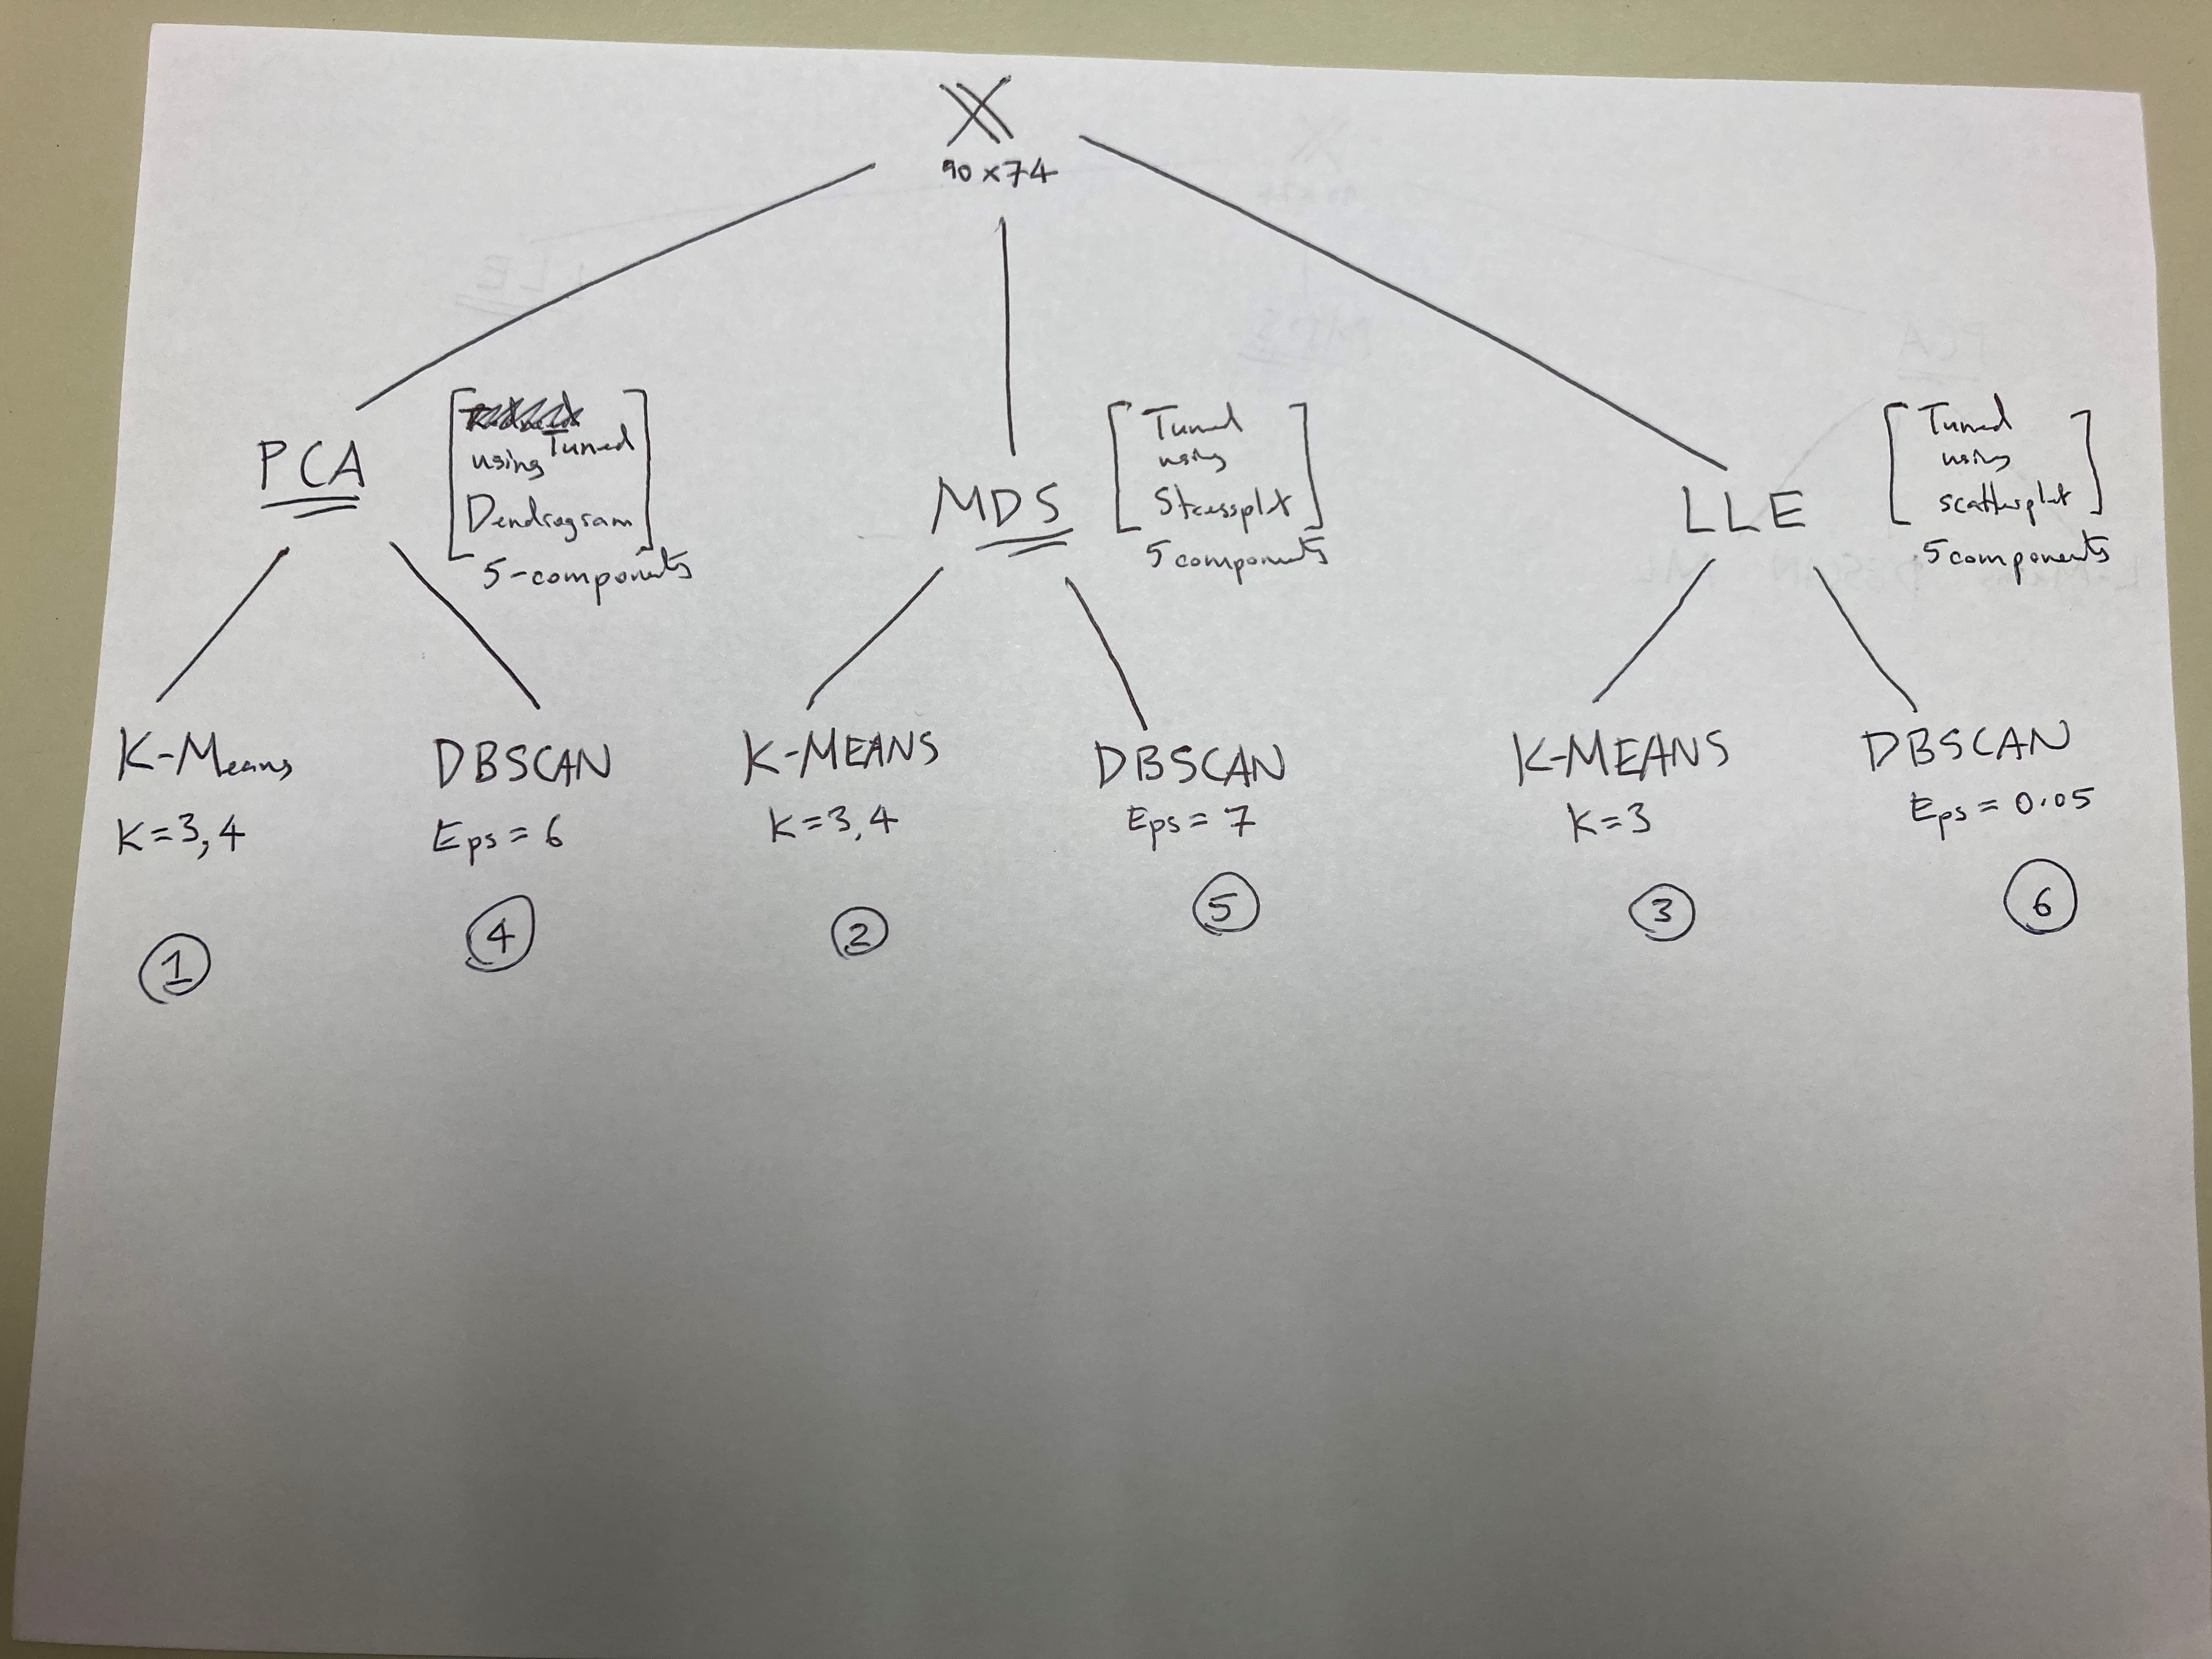

# Dimension Reduction

## PCA (Tuning Number of PCA Components)
* We see that the elbow in our scree plot exists from PCA_components= 2,...,7. 

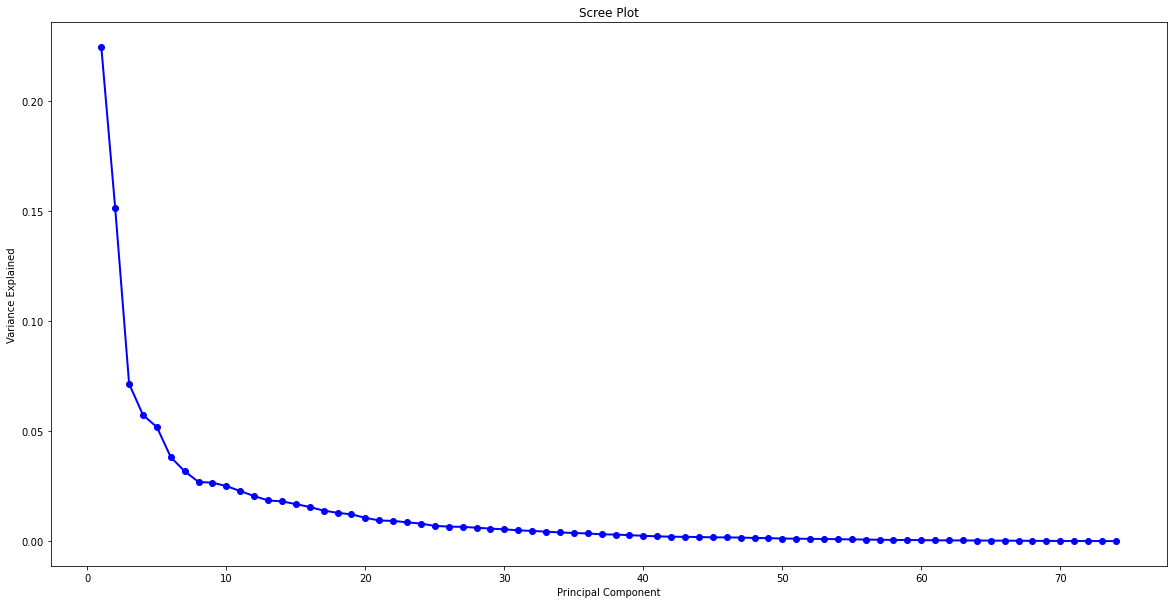

In [22]:
pca = PCA(n_components=74)
pca_fit = pca.fit(features_standardized)

PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize = (20, 10))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# MDS (Tuning Number of MDS Components)
- We see that the elbow of our Scree-type stress plot exists from MDS_components = 4,...,7.

In [8]:
def stressPlotter(FEATURES = features_standardized, NCOMP = 2, PLOT = True):
    
    #function that returns stress score and optionally returns stress plot
    #FEATURES --> feature set to perform mds on
    #NCOMP --> n_components to use for mds
    #PLOT --> if True then return stress splot
    
    mds_X = MDS(n_components = NCOMP, metric = True, dissimilarity = 'precomputed', random_state = 0)
    
    D_X = euclidean_distances(FEATURES)
    pts = mds_X.fit_transform(D_X)
    D_pts = euclidean_distances(pts)
    
    
    if PLOT:
        plt.figure()
        plt.scatter(D_X.flatten(), D_pts.flatten(), s = 10, c = 'hotpink')
        plt.title("Stres Plot -- Stress = " + str(mds_X.stress_))
    
    return(mds_X.stress_)

In [9]:
def stressScree(f = features_standardized, a = 2, b = 10):
    
    #function that creates a scree splot using stress stress scores for different n_component values
    #parameter f --> feature set to perform MDS on
    #parameter a --> determines starting value of n_components
    #parameter b --> determines ending value of n_components
    
    
    stress = np.zeros(b-a+1)

    for k in range(a,b+1):
        stress[k-a] = stressPlotter(FEATURES = f, NCOMP = k, PLOT = False)

    x = np.linspace(a,b,b-a+1,endpoint=True)
    plt.figure()
    plt.scatter(x,stress)

45784.73866226143

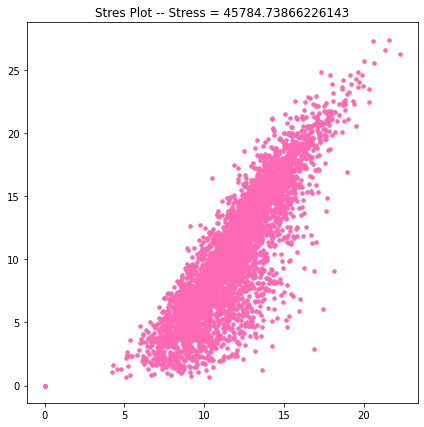

In [37]:
stressPlotter()

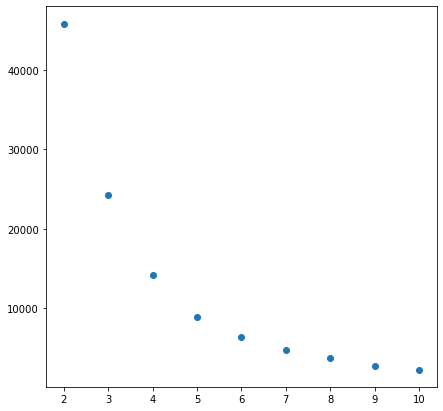

In [40]:
stressScree()

## LLE (Tuning number of components)

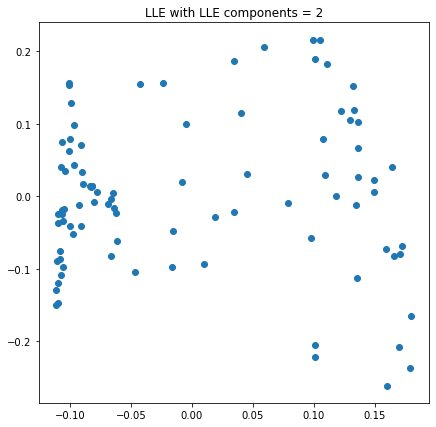

In [160]:
n_neighbors = 4
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='standard')
lle2 = clf.fit_transform(features_standardized)

plt.scatter(lle2[:, 0], lle2[:, 1])
plt.title("LLE with LLE components = 2")
plt.axis('tight')
plt.show()

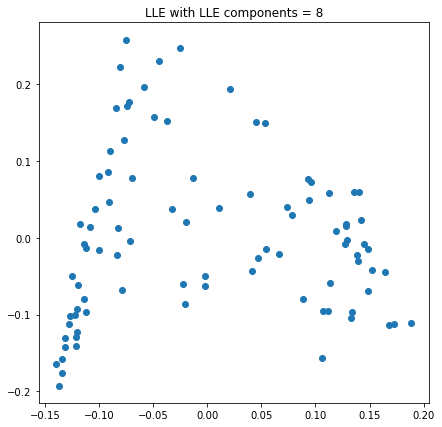

In [163]:
n_neighbors = 8
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='standard')
lle2 = clf.fit_transform(features_standardized)

plt.scatter(lle2[:, 0], lle2[:, 1])
plt.title("LLE with LLE components = 8")
plt.axis('tight')
plt.show()

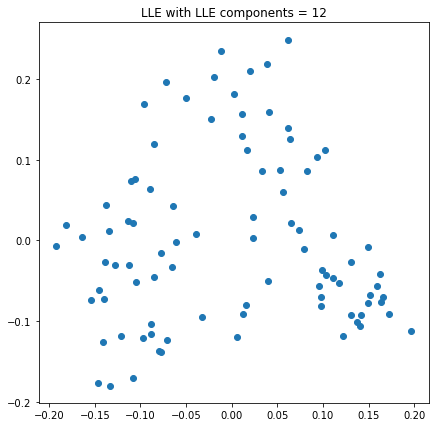

In [164]:
n_neighbors = 12
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='standard')
lle2 = clf.fit_transform(features_standardized)

plt.scatter(lle2[:, 0], lle2[:, 1])
plt.title("LLE with LLE components = 12")
plt.axis('tight')
plt.show()

# Tuning Clustering:

## Tuning k from K-Means Clustering

### Tuning k in PCA:

In [22]:
pca_5 = dim_reduct(features_standardized,REDUCTION='PCA',PCA_NCOMP=5)

In [25]:
plt.rcParams["figure.figsize"] = (7,7)

# ward's method
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage= 'ward')
model = model.fit(pca_5)
# complete linkage
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model1 = model1.fit(pca_5)
# average linkage
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model2 = model2.fit(pca_5)

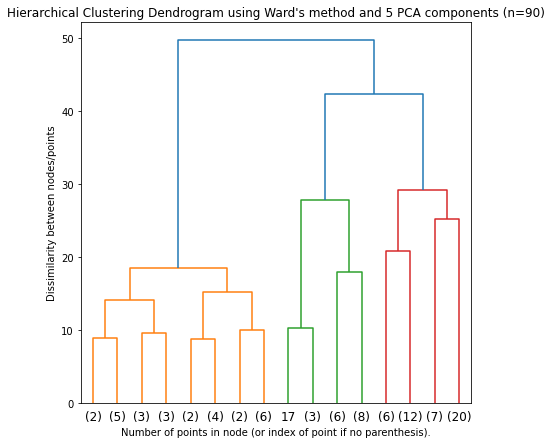

In [61]:
# Ward's method 
plt.title("Hierarchical Clustering Dendrogram using Ward's method and 5 PCA components (n=90)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

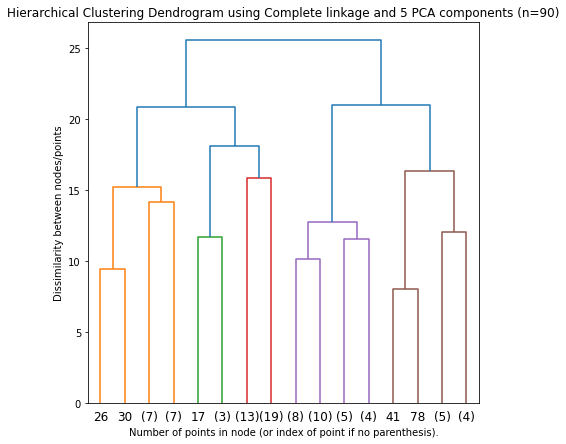

In [62]:
# Complete Linkage (5 Clusters)
plt.title("Hierarchical Clustering Dendrogram using Complete linkage and 5 PCA components (n=90)")
plot_dendrogram(model1, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

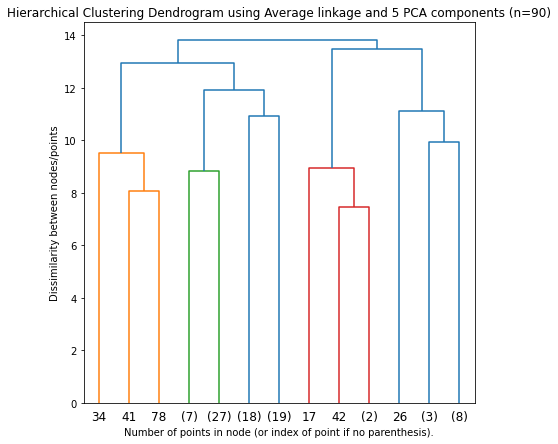

In [63]:
# Average Linkage (5 Clusters)
plt.title("Hierarchical Clustering Dendrogram using Average linkage and 5 PCA components (n=90)")
plot_dendrogram(model2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

[0 2 2 1 2 1 0 2 2 1 2 1 0 2 2 2 2 0 2 2 1 1 0 1 1 1 0 2 1 2 0 2 2 1 1 2 2
 2 2 2 2 1 0 2 1 1 1 1 1 1 1 2 2 1 2 2 1 1 0 2 2 2 0 1 1 1 0 1 2 1 0 1 1 1
 1 2 0 2 1 2 0 2 1 2 1 2 2 1 0 2]
For n_clusters = 3 The average silhouette_score is : 0.3202572534582231


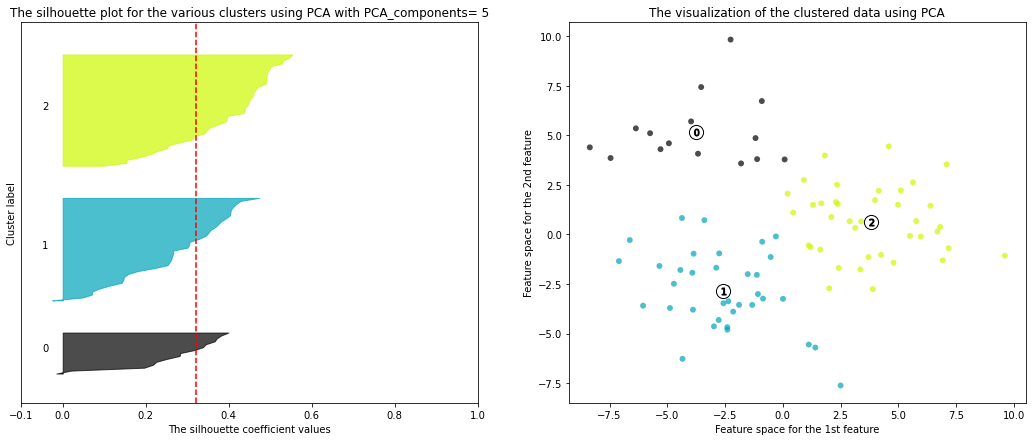

array([0, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1,
       0, 2])

In [69]:
# 5 PCA components, k=3
silhouettePlot(features_standardized,NCLUST=3,CLUSTER='KMEANS',REDUCTION='PCA',PCA_NCOMP=5)

[3 2 2 0 2 1 3 2 2 0 2 1 3 2 2 2 2 3 2 2 1 0 3 0 1 1 3 2 1 2 3 2 2 0 0 2 2
 2 2 2 2 0 3 0 1 1 0 1 0 1 0 2 2 0 2 2 0 0 3 2 2 2 3 0 1 1 3 0 2 0 3 1 1 0
 1 2 3 2 0 2 3 2 1 2 1 2 2 1 3 2]
For n_clusters = 4 The average silhouette_score is : 0.2855904206117958


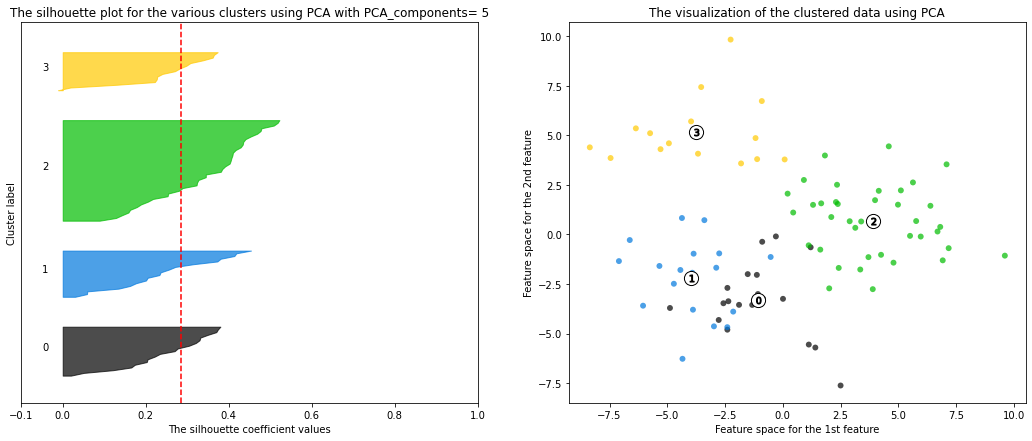

array([3, 2, 2, 0, 2, 1, 3, 2, 2, 0, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 1, 0,
       3, 0, 1, 1, 3, 2, 1, 2, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 3, 2, 2, 2, 3, 0, 1, 1,
       3, 0, 2, 0, 3, 1, 1, 0, 1, 2, 3, 2, 0, 2, 3, 2, 1, 2, 1, 2, 2, 1,
       3, 2])

In [70]:
# 5 PCA components, k=4
silhouettePlot(features_standardized,NCLUST=4,CLUSTER='KMEANS',REDUCTION='PCA',PCA_NCOMP=5)

### Tuning k (in K-means) on MDS reduced data

In [45]:
mds_5 = dim_reduct(features_standardized,REDUCTION='MDS',MDS_NCOMP=5)

In [65]:
plt.rcParams["figure.figsize"] = (7,7)

# ward's method
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage= 'ward')
model = model.fit(mds_5)
# complete linkage
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model1 = model1.fit(mds_5)
# average linkage
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model2 = model2.fit(mds_5)

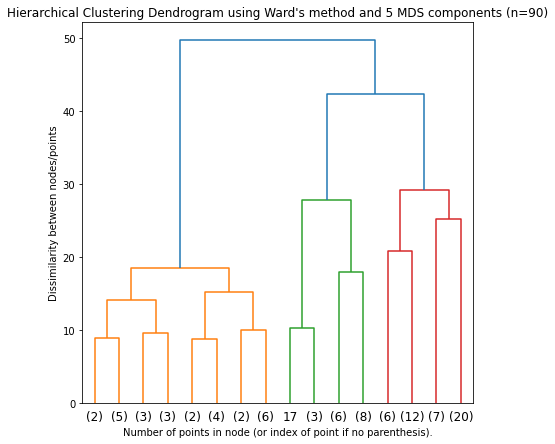

In [66]:
# Ward's method 
plt.title("Hierarchical Clustering Dendrogram using Ward's method and 5 MDS components (n=90)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

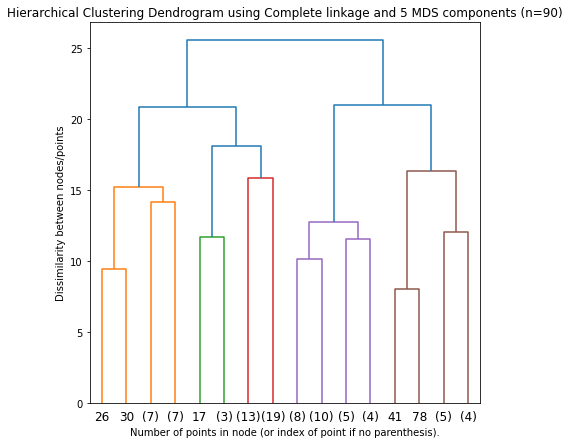

In [67]:
# Complete Linkage 
plt.title("Hierarchical Clustering Dendrogram using Complete linkage and 5 MDS components (n=90)")
plot_dendrogram(model1, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

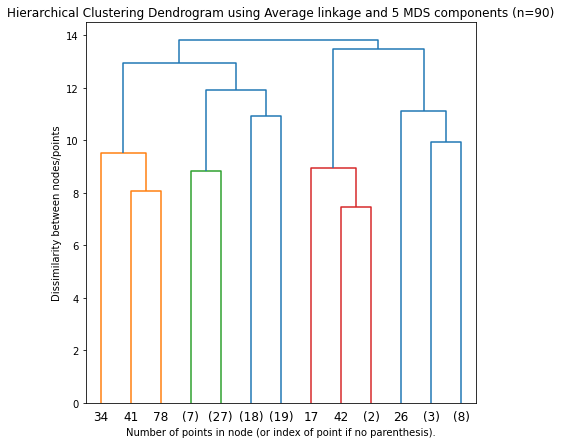

In [68]:
# Average Linkage 
plt.title("Hierarchical Clustering Dendrogram using Average linkage and 5 MDS components (n=90)")
plot_dendrogram(model2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

[1 2 2 0 2 0 1 2 2 0 2 0 1 2 2 2 2 1 2 2 0 0 1 0 0 0 1 2 0 2 1 2 2 0 0 2 2
 2 2 2 2 0 1 2 0 0 0 0 0 0 0 2 2 0 2 2 0 0 2 2 2 2 1 0 0 0 1 0 2 0 1 0 0 0
 0 2 1 2 0 2 1 2 0 2 0 2 2 0 1 2]
For n_clusters = 3 The average silhouette_score is : 0.23729356036691351


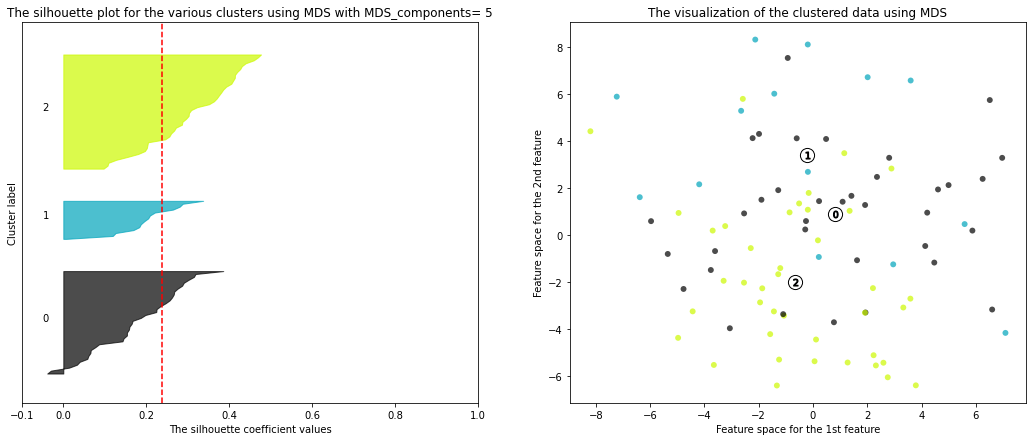

array([1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
       1, 2])

In [103]:
silhouettePlot(features_standardized,NCLUST=3,CLUSTER='KMEANS',REDUCTION='MDS',MDS_NCOMP=5)

[2 0 0 1 0 3 2 0 0 1 0 3 2 0 0 0 0 2 0 0 3 1 2 1 3 3 2 0 3 0 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 3 3 1 3 1 3 1 0 0 1 0 0 1 1 0 0 0 0 2 1 3 3 2 1 0 1 2 3 3 1
 3 0 2 0 1 0 2 0 3 0 3 3 0 3 2 0]
For n_clusters = 4 The average silhouette_score is : 0.22522593350705114


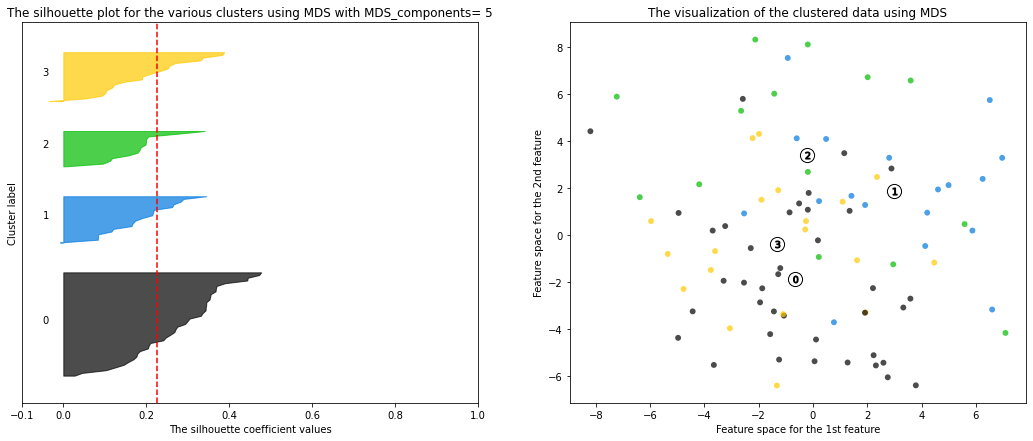

array([2, 0, 0, 1, 0, 3, 2, 0, 0, 1, 0, 3, 2, 0, 0, 0, 0, 2, 0, 0, 3, 1,
       2, 1, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       3, 3, 1, 3, 1, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 3, 3,
       2, 1, 0, 1, 2, 3, 3, 1, 3, 0, 2, 0, 1, 0, 2, 0, 3, 0, 3, 3, 0, 3,
       2, 0])

In [104]:
silhouettePlot(features_standardized,NCLUST=4,CLUSTER='KMEANS',REDUCTION='MDS',MDS_NCOMP=5)

## Tuning k (in K-means) for LLE reduced data

In [170]:
lle_12 = dim_reduct(features_standardized,REDUCTION='LLE',LLE_NEIGHBORS=12)

In [171]:
plt.rcParams["figure.figsize"] = (7,7)

# ward's method
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage= 'ward')
model = model.fit(lle_12)
# complete linkage
model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model1 = model1.fit(lle_12)
# average linkage
model2 = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model2 = model2.fit(lle_12)

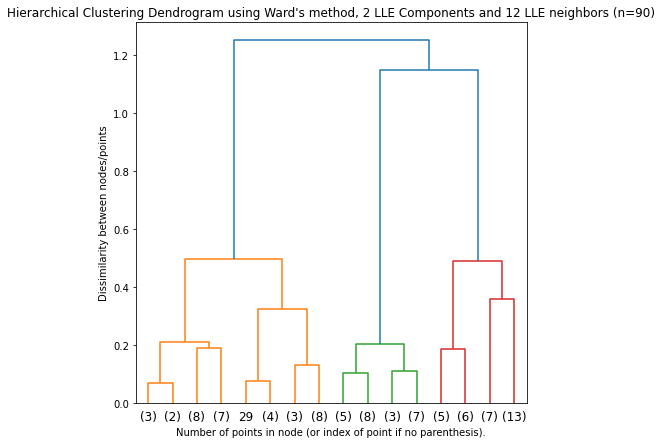

In [178]:
# Ward's method 
plt.title("Hierarchical Clustering Dendrogram using Ward's method, 2 LLE Components and 12 LLE neighbors (n=90)")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

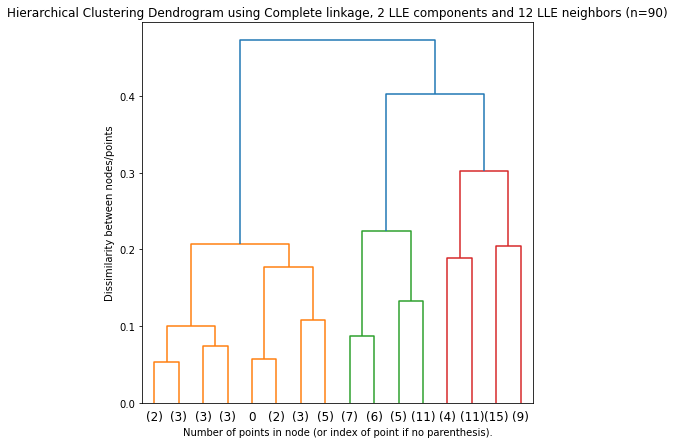

In [179]:
# Complete Linkage (12 LLE Components)
plt.title("Hierarchical Clustering Dendrogram using Complete linkage, 2 LLE components and 12 LLE neighbors (n=90)")
plot_dendrogram(model1, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

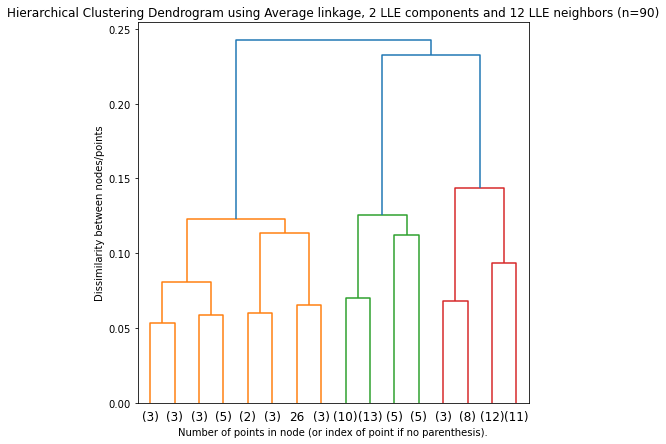

In [180]:
# Average Linkage (12 LLE Components)
plt.title("Hierarchical Clustering Dendrogram using Average linkage, 2 LLE components and 12 LLE neighbors (n=90)")
plot_dendrogram(model2, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Dissimilarity between nodes/points")
plt.show()

[2 0 0 1 2 1 2 0 0 1 0 1 2 0 0 2 0 2 0 0 1 1 2 1 1 1 2 0 1 0 2 0 0 1 1 0 0
 0 2 2 2 1 2 0 1 1 1 1 1 2 1 2 0 1 0 0 1 1 2 0 0 0 2 1 1 1 2 1 0 1 2 1 1 1
 1 0 2 0 1 0 2 2 1 0 1 0 0 1 2 2]
For n_clusters = 3 The average silhouette_score is : 0.5322204589761099


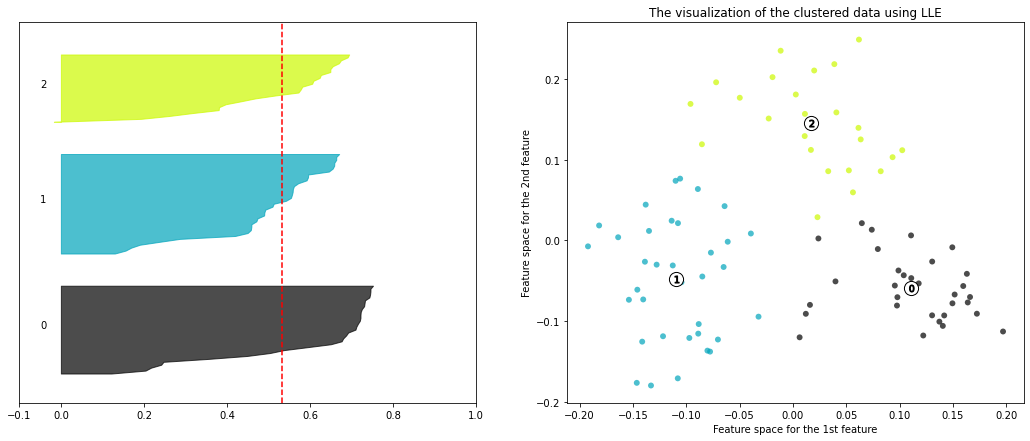

array([2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1,
       2, 2])

In [182]:
silhouettePlot(features_standardized,REDUCTION='LLE',LLE_NEIGHBORS = 12,CLUSTER='KMEANS', NCLUST=3)

# Tuning DBSCAN Epsilon 

### Tuning DBSCAN Epsilon in PCA data

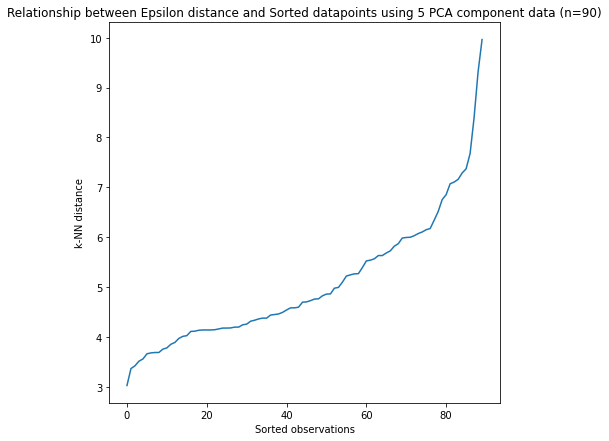

In [59]:
DBSCAN_Tuning(pca_5, REDUCTION = '5 PCA component data')

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
For n_clusters = 3 The average silhouette_score is : 0.3197660058818096


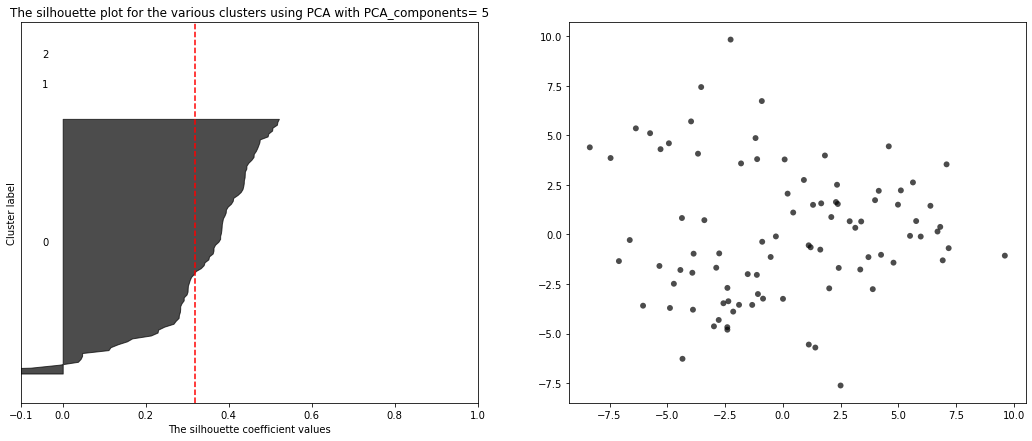

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0], dtype=int64)

In [204]:
silhouettePlot(features_standardized,CLUSTER='DBSCAN',REDUCTION='PCA',PCA_NCOMP=5, DBSCAN_EPS= 6)  

### MDS and DBSCAN

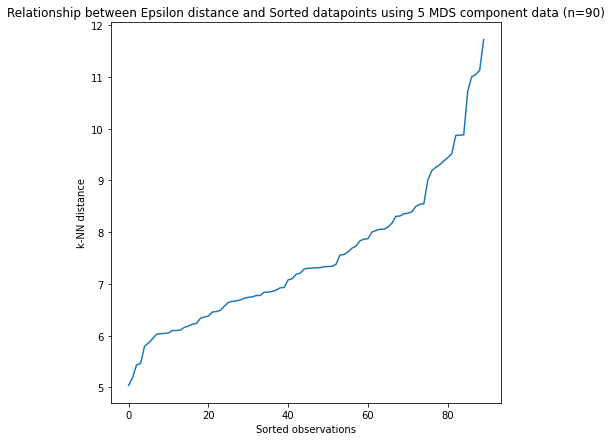

In [60]:
DBSCAN_Tuning(mds_5, REDUCTION = '5 MDS component data')

[ 0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0
  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0  0]
For n_clusters = 3 The average silhouette_score is : 0.23014755334758594


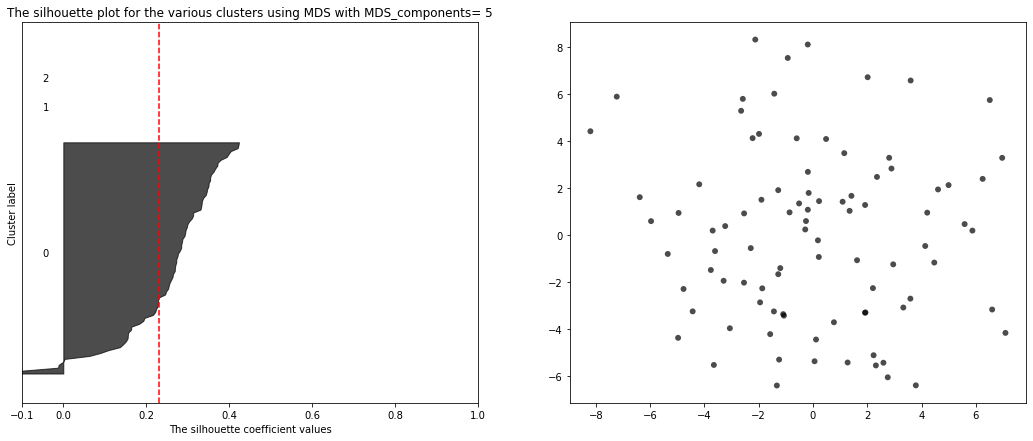

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0], dtype=int64)

In [187]:
silhouettePlot(features_standardized,CLUSTER='DBSCAN',REDUCTION='MDS',MDS_NCOMP=5, DBSCAN_EPS= 7)  

### LLE and DBSCAN

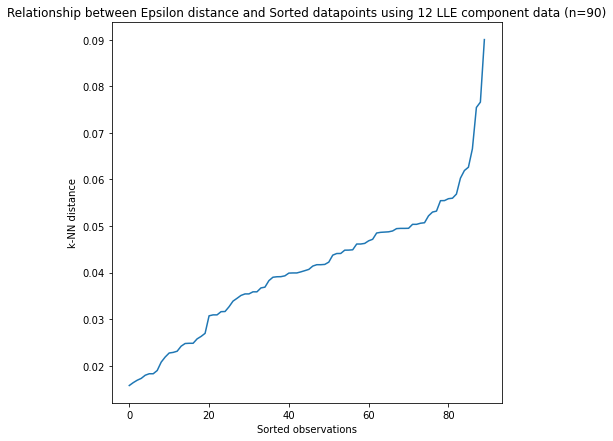

In [184]:
DBSCAN_Tuning(lle_12, REDUCTION = '12 LLE component data')

[-1  0  0  1  0  1  0  0  0  1  0  1  0  0  0  0  1  0  0  0  1  1  0  1
  1  1  1  0  1  1  0  0  0  1  1  0  0  0  0  0  0  1  0  1  1  1  1  1
  1  0  1  0  0  1  0  0  1  1  0  0  0  0  0  1  1  1  0  1  0  1  0  1
  1  1  1  0  0  1  1  0  0  0  1  0  1  0  0  1  0  0]
For n_clusters = 3 The average silhouette_score is : 0.2830375912400069


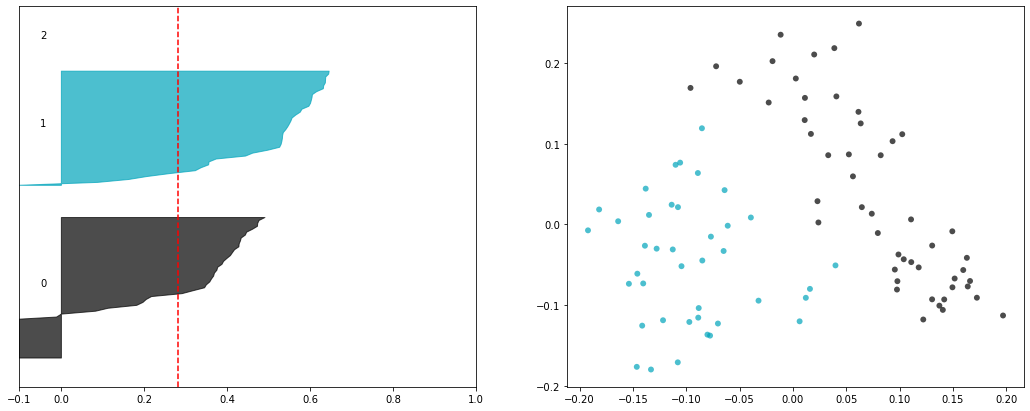

array([-1,  0,  0,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,
        0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  0,  1,
        0,  1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  0], dtype=int64)

In [203]:
silhouettePlot(features_standardized,REDUCTION='LLE',LLE_NEIGHBORS = 12,CLUSTER='DBSCAN', DBSCAN_EPS=0.05)